In [18]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [40]:
from fastai.vision import *
import os

In [20]:
path = './archive/256_ObjectCategories'

In [21]:
tfms = get_transforms(do_flip=False,flip_vert=False, max_rotate=0,max_lighting=0.3, max_zoom=1.01)

In [22]:
data = ImageDataBunch.from_folder(path, train=".", 
                                  valid_pct=0.2,
                                  ds_tfms=tfms,
                                  size=128,bs=64, 
                                  num_workers=0).normalize(imagenet_stats)

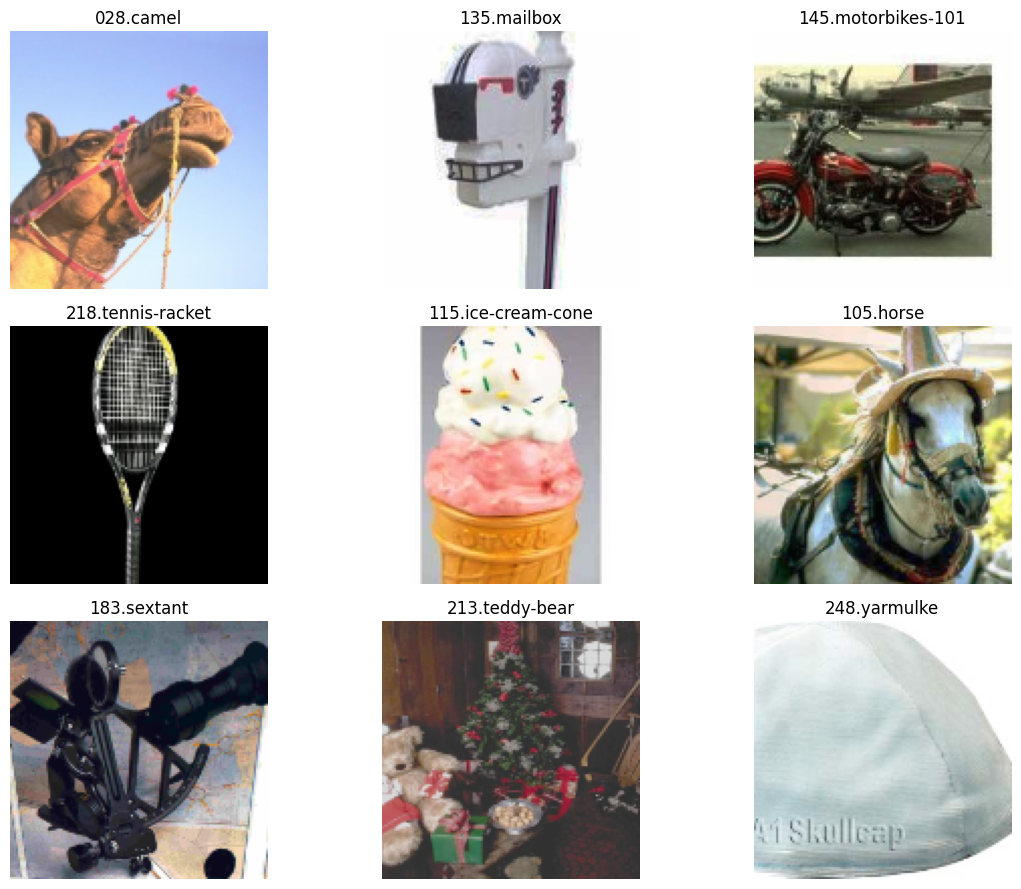

In [23]:
data.show_batch(rows=3, figsize=(12,9))

In [24]:
arch = models.resnet50

In [25]:
learn = cnn_learner(data, arch, metrics=accuracy, model_dir="./model")

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


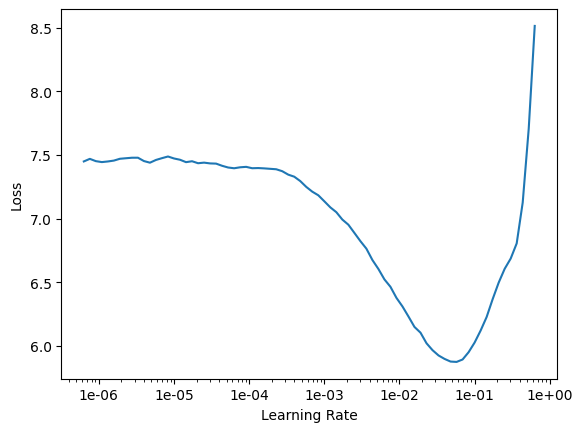

In [26]:
learn.lr_find()
learn.recorder.plot()

In [27]:
lr = 1e-01/2

In [28]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,2.274774,1.994038,0.558079,07:58
1,3.194399,2.471423,0.526221,06:43
2,2.327824,6.207869,0.644829,06:25
3,1.358588,1.338225,0.755432,06:24
4,0.970108,4.553565,0.780428,07:45


In [29]:
learn.save('stage1')

In [30]:
learn.freeze()

In [50]:
images_dict = {}

for root, dir, files in os.walk('./object-recognition-python/inputs/'):
    for file in files:
        path = root + file
        image = open_image(path)
        images_dict[path] = image

199.spoon
193.soccer-ball
208.swiss-army-knife
199.spoon
047.computer-mouse
240.watch-101


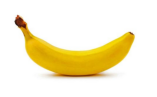

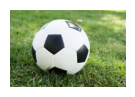

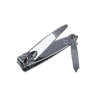

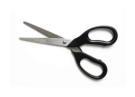

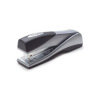

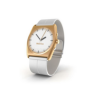

In [52]:
result_dictionary = {}

for image_path in images_dict.keys():
    image = images_dict[image_path]
    image.show(figsize=(2, 1))
    category, tensor, vector = learn.predict(image)
    result_dictionary[image_path] = category
    print(category)

In [ ]:
# coin, swiss-army-knife, watch, computer-mouse, spoon, dice